# Importing DataSet Using Pandas

In [1]:
import pandas as pd
train = pd.read_csv("C:/old backup/user/Downloads/music_train.csv")
test = pd.read_csv("C:/old backup/user/Downloads/music_test.csv")


# Understanding the Structure of Data

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15681 entries, 0 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        15681 non-null  object 
 1   track_name         15681 non-null  object 
 2   popularity         15039 non-null  float64
 3   acousticness       15681 non-null  float64
 4   danceability       15125 non-null  float64
 5   duration_ms        15587 non-null  float64
 6   energy             15587 non-null  float64
 7   instrumentalness   15586 non-null  float64
 8   key                15681 non-null  object 
 9   liveness           15681 non-null  float64
 10  loudness           15645 non-null  float64
 11  voice_gender       14916 non-null  object 
 12  mode               15646 non-null  object 
 13  speechiness        15655 non-null  float64
 14  tempo              15681 non-null  object 
 15  musician_category  14321 non-null  object 
 16  valence            150

In [3]:
train.describe()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,15039.000000,15681.000000,15125.000000,1.558700e+04,15587.000000,15586.000000,15681.000000,15645.000000,15655.000000,15004.000000
mean,50.822720,0.446922,0.570106,2.480008e+05,0.426977,0.264290,0.194089,-11.621471,0.096411,0.451400
std,17.679789,0.416981,0.215045,1.568312e+05,0.514145,0.395788,0.160291,8.663364,0.105647,0.277220
min,0.000000,0.000002,0.063962,-1.000000e+00,-1.000000,0.000000,0.016652,-50.054000,0.023858,0.000000
25%,39.017000,0.044521,0.418635,1.860163e+05,0.158277,0.000000,0.101674,-15.504000,0.039549,0.212242
50%,54.109000,0.295272,0.586114,2.362127e+05,0.560389,0.000719,0.128784,-8.611000,0.050425,0.432478
75%,63.449000,0.929001,0.733073,2.975593e+05,0.791881,0.638930,0.228973,-5.715000,0.094230,0.665369
max,108.512000,1.094410,1.072089,3.410383e+06,1.094853,1.078601,1.080959,1.389000,1.000445,1.076971


# Checking Missing Values

In [4]:
train.isna().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                   35
speechiness            26
tempo                   0
musician_category    1360
valence               677
music_genre             0
dtype: int64

# Treating Missing Values

In [5]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum())
    Q.columns=["CT"]
    w = list(Q[Q.CT>0].index)
    cat = []
    con = []
    for i in w:
        if(df[i].dtypes=="object"):
            cat.append(i)
        else:
            con.append(i)
    for i in con:
        replacer = df[i].mean()
        df[i] = df[i].fillna(replacer)
    for i in cat:
        replacer = pd.DataFrame(df[i].value_counts()).index[0]
        df[i] = df[i].fillna(replacer)

In [6]:
train

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.78799999999998,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.01799999999999,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.18299999999999,Band,0.074412,Classical
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15676,MSC_73047.0,I. Andante,0.000,0.866988,0.387476,-1.000,0.196799,0.028725,Scale B,0.248399,-16.331,Female,Major,0.045251,123.516,Band,0.624518,Classical
15677,MSC_34472.0,Only Trust Your Heart,40.514,0.883333,0.459917,378128.464,0.349263,0.000519,Scale F,0.681492,-25.087,Both,Major,0.448377,129.445,Duet,0.609022,Jazz
15678,MSC_32827.0,Moment's Notice,35.082,0.905281,0.566619,581799.061,0.543673,0.209238,Scale D Sharp,0.416611,-10.246,Female,Major,0.040625,123.17,NaN,0.869294,Jazz
15679,MSC_89976.0,Such Small Scenes,59.693,0.113408,0.644554,151226.592,0.912201,0.000089,Scale F,0.166336,-7.257,Both,Minor,0.060308,116.07700000000001,Duet,0.402700,Rock


In [7]:
train.tempo = train.tempo.replace("?","").astype(str)

In [8]:
train = train.rename(columns={"mode":"Mode"})

In [9]:
train.Mode = train.Mode.replace("?","Major").astype(str)

In [10]:
train = train.drop(["instance_id","track_name"],axis=1)

In [11]:
train.tempo = pd.to_numeric(train.tempo)

In [12]:
replacer(train)

In [13]:
train.isna().sum()

popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
voice_gender         0
Mode                 0
speechiness          0
tempo                0
musician_category    0
valence              0
music_genre          0
dtype: int64

In [18]:
train.head()

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,Mode,speechiness,tempo,musician_category,valence,music_genre
0,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,Female,Major,0.046404,143.788000,Band,0.598965,Jazz
1,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,Major,0.039949,115.447641,Band,0.357194,Jazz
2,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.018000,Band,0.635525,Rap
3,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,115.447641,Duet,0.983750,Rock
4,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.183000,Band,0.074412,Classical


In [19]:
Y = train[["music_genre"]]

In [20]:
X = train.drop(["music_genre"],axis=1)

In [21]:
X

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,Mode,speechiness,tempo,musician_category,valence
0,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,Female,Major,0.046404,143.788000,Band,0.598965
1,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,Major,0.039949,115.447641,Band,0.357194
2,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.018000,Band,0.635525
3,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,115.447641,Duet,0.983750
4,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.183000,Band,0.074412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15676,0.000,0.866988,0.387476,-1.000,0.196799,0.028725,Scale B,0.248399,-16.331,Female,Major,0.045251,123.516000,Band,0.624518
15677,40.514,0.883333,0.459917,378128.464,0.349263,0.000519,Scale F,0.681492,-25.087,Both,Major,0.448377,129.445000,Duet,0.609022
15678,35.082,0.905281,0.566619,581799.061,0.543673,0.209238,Scale D Sharp,0.416611,-10.246,Female,Major,0.040625,123.170000,Band,0.869294
15679,59.693,0.113408,0.644554,151226.592,0.912201,0.000089,Scale F,0.166336,-7.257,Both,Minor,0.060308,116.077000,Duet,0.402700


# Data Visualisation 

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


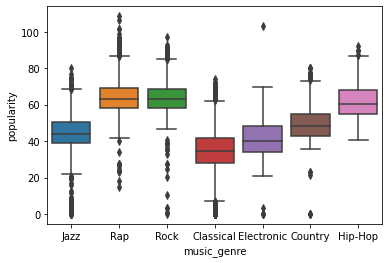

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


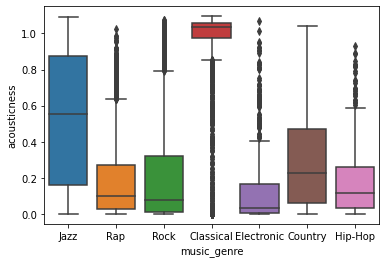

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


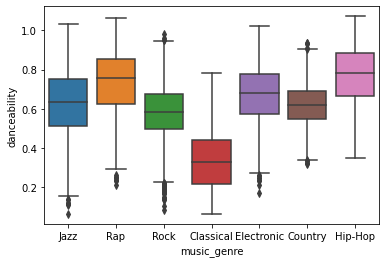

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


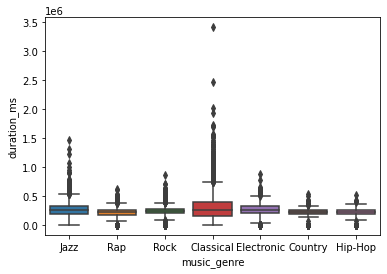

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


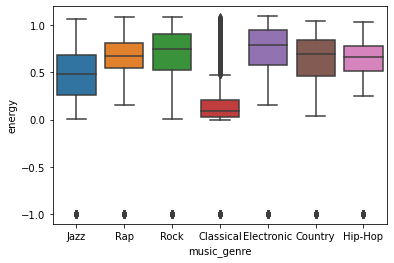

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


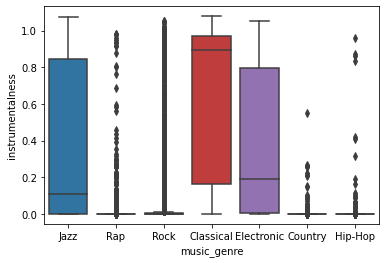

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


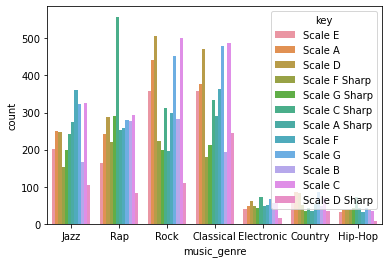

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


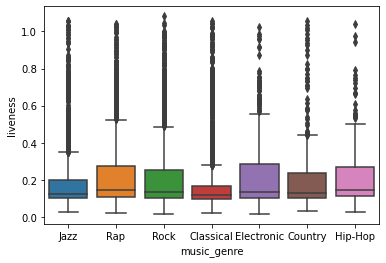

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


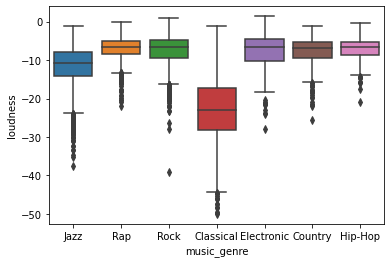

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


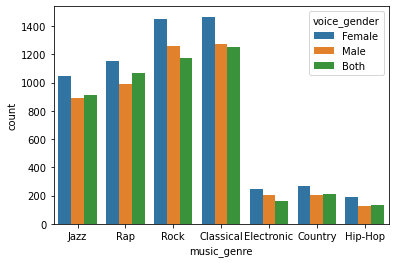

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


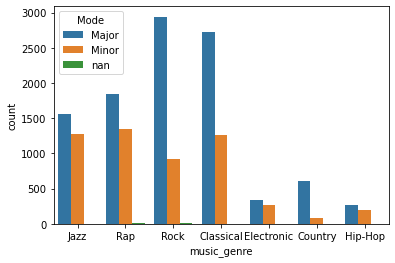

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


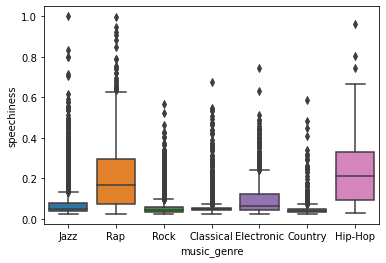

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


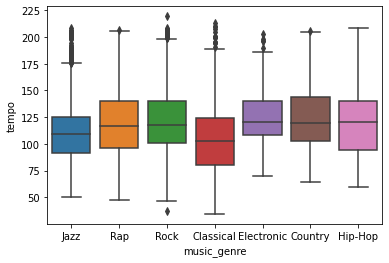

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


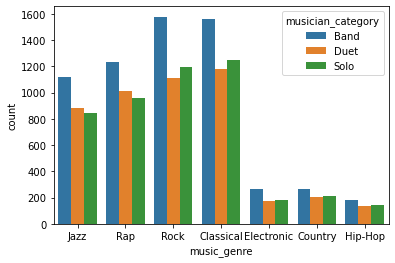

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


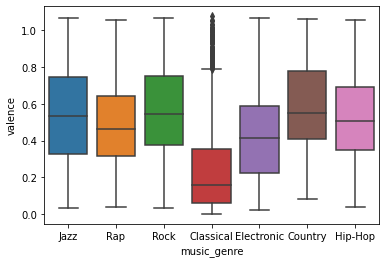

In [22]:
import seaborn as sb
import matplotlib.pyplot as plt
for i in X.columns:
    if(X[i].dtypes=="object"):
        sb.countplot(Y.music_genre,hue=X[i])
        plt.show()
    else:
        sb.boxplot(Y.music_genre,X[i])
        plt.show()

# Seprating Categorical and Continueos Columns

In [27]:
cat = []
con = []
for i in X.columns:
    if(X[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [28]:
cat

['key', 'voice_gender', 'Mode', 'musician_category']

In [29]:
Q = X[["key"]]

In [30]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X1 = pd.DataFrame(le.fit_transform(Q),columns = Q.columns)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [31]:
W = X[["voice_gender"]]

In [32]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X2 = pd.DataFrame(le.fit_transform(W),columns = W.columns)

In [33]:
E = X[["Mode"]]

In [34]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X3 = pd.DataFrame(le.fit_transform(E),columns = E.columns)

In [35]:
R = X[["musician_category"]]

In [36]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X4 = pd.DataFrame(le.fit_transform(R),columns = R.columns)

In [37]:
XX = X1.join(X2)

In [38]:
XX = XX.join(X3)

In [39]:
XX = XX.join(X4)

In [40]:
X = XX.join(X[con])

In [41]:
X

,key,voice_gender,Mode,musician_category,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
0,7,1,0,0,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,0.147134,-14.140,0.046404,143.788000,0.598965
1,0,2,0,0,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,0.174655,-13.716,0.039949,115.447641,0.357194
2,5,1,0,0,89.023,0.020041,0.967948,273314.723,0.857411,0.000000,0.042030,-4.995,0.119917,105.018000,0.635525
3,5,0,0,1,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,0.124637,-4.262,0.167493,115.447641,0.983750
4,9,1,1,0,45.095,0.858769,0.280645,410136.987,0.114732,0.002753,0.134782,-26.922,0.039139,112.183000,0.074412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15676,2,1,0,0,0.000,0.866988,0.387476,-1.000,0.196799,0.028725,0.248399,-16.331,0.045251,123.516000,0.624518
15677,8,0,0,1,40.514,0.883333,0.459917,378128.464,0.349263,0.000519,0.681492,-25.087,0.448377,129.445000,0.609022
15678,6,1,0,0,35.082,0.905281,0.566619,581799.061,0.543673,0.209238,0.416611,-10.246,0.040625,123.170000,0.869294
15679,8,0,1,1,59.693,0.113408,0.644554,151226.592,0.912201,0.000089,0.166336,-7.257,0.060308,116.077000,0.402700


# Splitting the Data into Training and Testing

In [42]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(X,Y,test_size=0.2,random_state=22)

# Logistic Regression Model

In [43]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
from sklearn.metrics import accuracy_score
acc_tr = accuracy_score(ytrain,pred_tr)
acc_ts = accuracy_score(ytest,pred_ts)
print("training acc:",acc_tr)
print("testing_acc:",acc_ts)
if acc_tr>acc_ts:
    print("Model OverFitting")

training acc: 0.4606983418367347
testing_acc: 0.44501115715651895
Model OverFitting


# Decision Tree Model

In [53]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=22,criterion='entropy')

In [54]:
model = dtc.fit(xtrain,ytrain)
pred_ts = model.predict(xtest)
pred_tr = model.predict(xtrain)
from sklearn.metrics import accuracy_score
tsa = accuracy_score(ytest,pred_ts)
tra = accuracy_score(ytrain,pred_tr)
if(tsa < tra):
    print("Overfitting has occurred")
else:
    print("No overfitting")

print("Training accuracy is: ",tra)
print("\nTesting accuracy is: ",tsa)

Overfitting has occurred
Training accuracy is:  1.0

Testing accuracy is:  0.6557220274147274


# Random Forest Model

In [55]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=32,criterion='gini',max_depth=6,n_estimators=12)

In [56]:
model = rfc.fit(xtrain,ytrain)
pred_ts = model.predict(xtest)
pred_tr = model.predict(xtrain)
from sklearn.metrics import accuracy_score
tsa = accuracy_score(ytest,pred_ts)
tra = accuracy_score(ytrain,pred_tr)
if(tsa < tra):
    print("Overfitting has occurred")
else:
    print("No overfitting")

print("Training accuracy is: ",tra)
print("\nTesting accuracy is: ",tsa)

<ipython-input-56-bdafbcae8ff9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rfc.fit(xtrain,ytrain)


Overfitting has occurred
Training accuracy is:  0.7473692602040817

Testing accuracy is:  0.7408351928594198


# Adaboost Model

In [57]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4,random_state=21),n_estimators=20)

In [58]:
model = ab.fit(xtrain,ytrain)
pred_ts = model.predict(xtest)
pred_tr = model.predict(xtrain)
from sklearn.metrics import accuracy_score
tsa = accuracy_score(ytest,pred_ts)
tra = accuracy_score(ytrain,pred_tr)
if(tsa < tra):
    print("Overfitting has occurred")
else:
    print("No overfitting")

print("Training accuracy is: ",tra)
print("\nTesting accuracy is: ",tsa)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Overfitting has occurred
Training accuracy is:  0.6195790816326531

Testing accuracy is:  0.6126872808415684


# Feature Importance

In [59]:
rfc.feature_importances_

array([0.0010521 , 0.00028745, 0.00784979, 0.00038663, 0.22647011,
       0.21074998, 0.12669646, 0.01270683, 0.07106398, 0.0523668 ,
       0.00188634, 0.16900165, 0.08590727, 0.0060566 , 0.02751802])

In [60]:
Q = pd.DataFrame([xtrain.columns,rfc.feature_importances_]).T

In [61]:
Q.columns=["Column_name","Feature_importance"]

<BarContainer object of 15 artists>

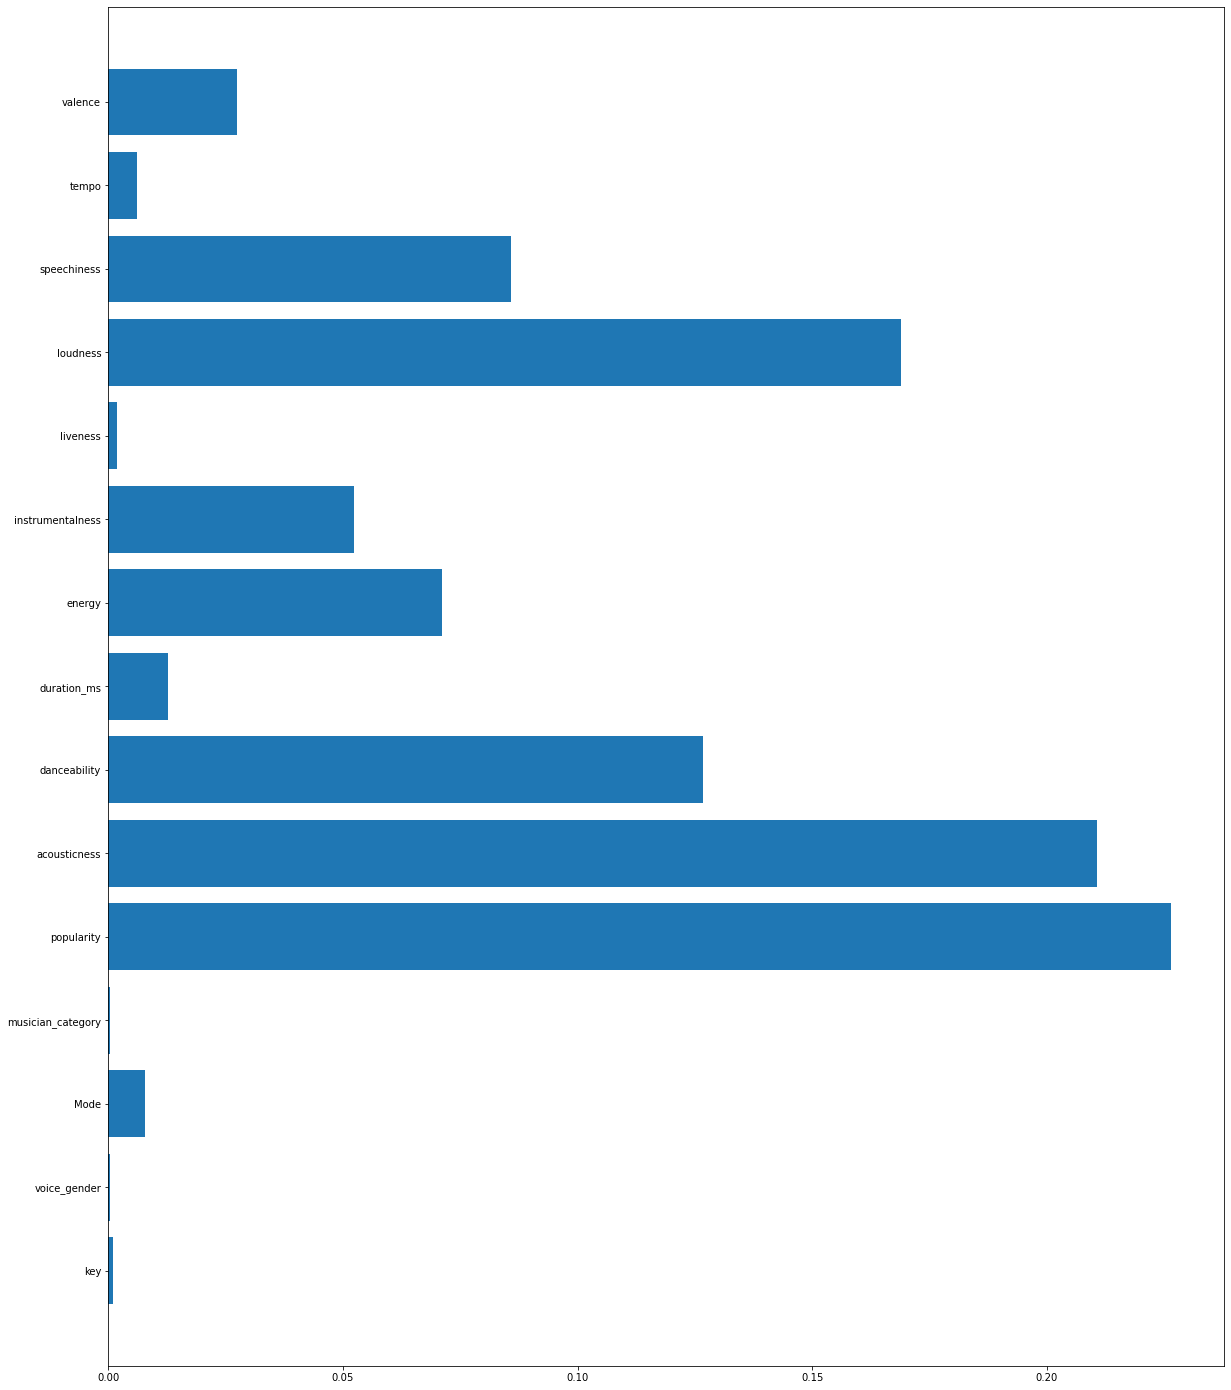

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,25))
plt.barh(Q.Column_name,Q.Feature_importance)

In [77]:
X = X[["loudness","speechiness","danceability","acousticness","popularity"]]

In [78]:
X.head()

,loudness,speechiness,danceability,acousticness,popularity
0,-14.140,0.046404,0.580508,0.970522,49.178
1,-13.716,0.039949,0.687542,1.009380,59.827
2,-4.995,0.119917,0.967948,0.020041,89.023
3,-4.262,0.167493,0.616287,0.010284,55.762
4,-26.922,0.039139,0.280645,0.858769,45.095


In [79]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest =train_test_split(X,Y,test_size=0.2,random_state=32)

In [80]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=32,criterion='gini',max_depth=5,n_estimators=10)

In [81]:
model = rfc.fit(xtrain,ytrain)
pred_ts = model.predict(xtest)
pred_tr = model.predict(xtrain)
from sklearn.metrics import accuracy_score
tsa = accuracy_score(ytest,pred_ts)
tra = accuracy_score(ytrain,pred_tr)
if(tsa < tra):
    print("Overfitting has occurred")
else:
    print("No overfitting")

print("Training accuracy is: ",tra)
print("\nTesting accuracy is: ",tsa)

<ipython-input-81-bdafbcae8ff9>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rfc.fit(xtrain,ytrain)


No overfitting
Training accuracy is:  0.7303093112244898

Testing accuracy is:  0.7354160025502072


In [82]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred_tr = model.predict(xtrain)
pred_ts = model.predict(xtest)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [83]:
from sklearn.metrics import accuracy_score
acc_tr = accuracy_score(ytrain,pred_tr)
acc_ts = accuracy_score(ytest,pred_ts)
print("training acc:",acc_tr)
print("testing_acc:",acc_ts)
if acc_tr>acc_ts:
    print("Model OverFitting")

training acc: 0.6560108418367347
testing_acc: 0.6579534587185208


In [84]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
ab = AdaBoostClassifier(DecisionTreeClassifier(max_depth=4,random_state=21),n_estimators=20)

In [85]:
model = ab.fit(xtrain,ytrain)
pred_ts = model.predict(xtest)
pred_tr = model.predict(xtrain)
from sklearn.metrics import accuracy_score
tsa = accuracy_score(ytest,pred_ts)
tra = accuracy_score(ytrain,pred_tr)
if(tsa < tra):
    print("Overfitting has occurred")
else:
    print("No overfitting")

print("Training accuracy is: ",tra)
print("\nTesting accuracy is: ",tsa)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Overfitting has occurred
Training accuracy is:  0.5746173469387755

Testing accuracy is:  0.5451067899266815


In [86]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=22,criterion='entropy')

model = dtc.fit(xtrain,ytrain)
pred_ts = model.predict(xtest)
pred_tr = model.predict(xtrain)
from sklearn.metrics import accuracy_score
tsa = accuracy_score(ytest,pred_ts)
tra = accuracy_score(ytrain,pred_tr)
if(tsa < tra):
    print("Overfitting has occurred")
else:
    print("No overfitting")

print("Training accuracy is: ",tra)
print("\nTesting accuracy is: ",tsa)

Overfitting has occurred
Training accuracy is:  1.0

Testing accuracy is:  0.6394644564870896


# Random Forest Model Gives Better Accuracy

In [87]:
test.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
0,MSC_70753.0,"Bard, a Man of Lake-town - Extended Version",26.101,0.823765,0.115490,211462.287,0.125325,0.945272,Scale A Sharp,0.120392,-25.541,Both,Minor,0.038657,80.777,Duet,0.041238
1,MSC_24064.0,New Kings,66.325,0.015441,0.592838,249151.238,0.870798,0.000108,Scale E,0.406722,-3.905,Male,?,0.051368,76.00399999999999,Band,0.456309
2,MSC_22731.0,Silver Lining,71.871,0.001006,0.510340,215693.240,0.683077,0.000000,Scale C,0.084608,-6.825,Female,Major,0.034303,144.458,Solo,0.193332
3,MSC_32095.0,A Tale That Wasn't Right,56.151,0.315650,0.338336,307056.179,0.608904,0.000000,Scale A,0.276811,-8.382,Female,Minor,0.036934,118.145,Solo,0.214906
4,MSC_24198.0,Get Ready,43.687,0.038336,0.773904,352802.872,0.955500,0.000007,Scale D,0.301726,-4.733,Both,Major,0.079688,95.012,Duet,0.757347


# Prediction on Testing data Using Random Forest

In [96]:
test.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
0,MSC_70753.0,"Bard, a Man of Lake-town - Extended Version",26.101,0.823765,0.115490,211462.287,0.125325,0.945272,Scale A Sharp,0.120392,-25.541,Both,Minor,0.038657,80.777,Duet,0.041238
1,MSC_24064.0,New Kings,66.325,0.015441,0.592838,249151.238,0.870798,0.000108,Scale E,0.406722,-3.905,Male,?,0.051368,76.00399999999999,Band,0.456309
2,MSC_22731.0,Silver Lining,71.871,0.001006,0.510340,215693.240,0.683077,0.000000,Scale C,0.084608,-6.825,Female,Major,0.034303,144.458,Solo,0.193332
3,MSC_32095.0,A Tale That Wasn't Right,56.151,0.315650,0.338336,307056.179,0.608904,0.000000,Scale A,0.276811,-8.382,Female,Minor,0.036934,118.145,Solo,0.214906
4,MSC_24198.0,Get Ready,43.687,0.038336,0.773904,352802.872,0.955500,0.000007,Scale D,0.301726,-4.733,Both,Major,0.079688,95.012,Duet,0.757347


In [97]:
test.isna().sum()

instance_id            0
track_name             0
popularity           166
acousticness           0
danceability         139
duration_ms           21
energy                33
instrumentalness      23
key                    0
liveness               0
loudness               3
voice_gender         186
mode                  14
speechiness            7
tempo                  0
musician_category    312
valence              191
dtype: int64

In [98]:
def replacer(df):
    import pandas as pd
    Q = pd.DataFrame(df.isna().sum())
    Q.columns=["CT"]
    w = list(Q[Q.CT>0].index)
    cat = []
    con = []
    for i in w:
        if(df[i].dtypes=="object"):
            cat.append(i)
        else:
            con.append(i)
    for i in con:
        replacer = df[i].mean()
        df[i] = df[i].fillna(replacer)
    for i in cat:
        replacer = pd.DataFrame(df[i].value_counts()).index[0]
        df[i] = df[i].fillna(replacer)

In [103]:
test.tempo = test.tempo.replace("?","").astype(str)

In [104]:
test = test.rename(columns={"mode":"Mode"})

In [105]:
test.Mode = test.Mode.replace("?","Major").astype(str)

In [106]:
test = test.drop(["instance_id","track_name"],axis=1)

In [107]:
test.tempo = pd.to_numeric(test.tempo)

In [110]:
replacer(test)

In [111]:
test.isna().sum()

popularity           0
acousticness         0
danceability         0
duration_ms          0
energy               0
instrumentalness     0
key                  0
liveness             0
loudness             0
voice_gender         0
Mode                 0
speechiness          0
tempo                0
musician_category    0
valence              0
dtype: int64

In [114]:
X_test = test

In [190]:
X_test

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,Mode,speechiness,tempo,musician_category,valence
0,26.101,0.823765,0.115490,211462.287,0.125325,0.945272,Scale A Sharp,0.120392,-25.541,Both,Minor,0.038657,80.777000,Duet,0.041238
1,66.325,0.015441,0.592838,249151.238,0.870798,0.000108,Scale E,0.406722,-3.905,Male,Major,0.051368,76.004000,Band,0.456309
2,71.871,0.001006,0.510340,215693.240,0.683077,0.000000,Scale C,0.084608,-6.825,Female,Major,0.034303,144.458000,Solo,0.193332
3,56.151,0.315650,0.338336,307056.179,0.608904,0.000000,Scale A,0.276811,-8.382,Female,Minor,0.036934,118.145000,Solo,0.214906
4,43.687,0.038336,0.773904,352802.872,0.955500,0.000007,Scale D,0.301726,-4.733,Both,Major,0.079688,95.012000,Duet,0.757347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,28.296,0.880373,0.239413,334617.187,0.046885,0.000008,Scale B,0.149835,-26.465,Both,Major,0.044304,116.111768,Solo,0.159485
3917,57.506,0.002973,0.658013,266627.734,-1.000000,0.000000,Scale E,0.308676,-6.282,Female,Minor,0.033955,120.048000,Band,0.384031
3918,40.085,1.065965,0.199430,237468.634,0.066235,0.998231,Scale G,0.074738,-30.092,Both,Major,0.051459,66.095000,Solo,0.333884
3919,52.468,0.607947,0.677778,237945.370,0.313435,0.000002,Scale D Sharp,0.115475,-14.411,Both,Major,0.032643,97.999000,Band,0.203295


In [120]:
cat = []
con = []
for i in X_test.columns:
    if(X_test[i].dtypes=="object"):
        cat.append(i)
    else:
        con.append(i)

In [128]:
cat

['key', 'voice_gender', 'Mode', 'musician_category']

In [129]:
Q = X_test[["key"]]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_t1 = pd.DataFrame(le.fit_transform(Q),columns = Q.columns)

In [130]:
W = X_test[["voice_gender"]]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_t2 = pd.DataFrame(le.fit_transform(W),columns = W.columns)

In [131]:
E = X_test[["Mode"]]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_t3 = pd.DataFrame(le.fit_transform(E),columns = E.columns)

In [132]:
R = X_test[["musician_category"]]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X_t4 = pd.DataFrame(le.fit_transform(R),columns = R.columns)

In [156]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
dd = pd.DataFrame(ss.fit_transform(X_test[con]),columns=con)


In [157]:
X_cat = X_t1.join(X_t2)

In [158]:
X_cat1 = X_t3.join(X_t4)

In [159]:
X_TEST_CAT = X_cat.join(X_cat1)

In [160]:
X_T = X_TEST_CAT.join(dd)

In [195]:
X_T = X_T[["loudness","speechiness","danceability","acousticness","popularity"]]

In [196]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=32,criterion='gini',max_depth=6,n_estimators=12)

In [200]:
model = rfc.fit(xtrain,ytrain)
prediction = pred_ts = model.predict(X_T)

<ipython-input-200-c890eb657922>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model = rfc.fit(xtrain,ytrain)


In [201]:
prediction = pd.DataFrame(prediction)

In [204]:
prediction.columns = [["Predicted_Music_Genre"]]

In [206]:
Final_output = X_test.join(prediction)

In [207]:
Final_output

,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,Mode,speechiness,tempo,musician_category,valence,"(Predicted_Music_Genre,)"
0,26.101,0.823765,0.115490,211462.287,0.125325,0.945272,Scale A Sharp,0.120392,-25.541,Both,Minor,0.038657,80.777000,Duet,0.041238,Classical
1,66.325,0.015441,0.592838,249151.238,0.870798,0.000108,Scale E,0.406722,-3.905,Male,Major,0.051368,76.004000,Band,0.456309,Classical
2,71.871,0.001006,0.510340,215693.240,0.683077,0.000000,Scale C,0.084608,-6.825,Female,Major,0.034303,144.458000,Solo,0.193332,Classical
3,56.151,0.315650,0.338336,307056.179,0.608904,0.000000,Scale A,0.276811,-8.382,Female,Minor,0.036934,118.145000,Solo,0.214906,Classical
4,43.687,0.038336,0.773904,352802.872,0.955500,0.000007,Scale D,0.301726,-4.733,Both,Major,0.079688,95.012000,Duet,0.757347,Electronic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3916,28.296,0.880373,0.239413,334617.187,0.046885,0.000008,Scale B,0.149835,-26.465,Both,Major,0.044304,116.111768,Solo,0.159485,Classical
3917,57.506,0.002973,0.658013,266627.734,-1.000000,0.000000,Scale E,0.308676,-6.282,Female,Minor,0.033955,120.048000,Band,0.384031,Classical
3918,40.085,1.065965,0.199430,237468.634,0.066235,0.998231,Scale G,0.074738,-30.092,Both,Major,0.051459,66.095000,Solo,0.333884,Classical
3919,52.468,0.607947,0.677778,237945.370,0.313435,0.000002,Scale D Sharp,0.115475,-14.411,Both,Major,0.032643,97.999000,Band,0.203295,Jazz
